#**Project Name -  Flipkart Project**







Project Type - Supervised Machine Learning , Multiclass Classification



Contribution - Individual


# **Project Summary -**

#CSAT Score Forecasting Using ML






The project "CSAT Score Forecasting Using ML" focuses on predicting customer satisfaction scores using machine learning techniques. Customer Satisfaction (CSAT) Score is a key metric that shows how happy customers are after a support interaction. This project uses historical customer support data, including response times, issue types, product details, and timestamps, to build a predictive model. After cleaning the data, handling missing values, encoding categories, and calculating features like response time, the dataset is prepared for training. The CSAT score is used as the target variable, and the top features are selected using statistical methods. To deal with class imbalance, the SMOTE technique is applied. Three models—Logistic Regression, Random Forest, and XGBoost—are trained and evaluated using accuracy, confusion matrices, and classification reports. XGBoost performed best and was further improved through hyperparameter tuning, achieving around 80% accuracy. This system can help companies monitor and improve customer experience by automatically identifying cases likely to result in poor satisfaction, making it a valuable tool for service-driven businesses.

# **GitHub Link -**


https://github.com/greesh29gg/CSAT-Prediction

# **Problem Statement** -


The main objective of this project is to develop a machine learning-based system that accurately predicts a customer’s CSAT score based on features extracted from support interaction data. These features include timestamps, product categories, customer complaints, and response times. By forecasting customer satisfaction levels, businesses can proactively identify service gaps, improve operational efficiency, and increase customer retention.

# **General Guidelines** -

✅ Define the Objective Clearly

📦 Organize the Code and Notebook

📊 Visualize Key Steps

🧼 Preprocessing Best Practices

🎯 Model Selection Strategy

⚖️ Class Imbalance Handling

📈 Evaluate with Multiple Metrics

🔍 Hyperparameter Tuning

🧾 Document Everything

✅ Final Deliverables

# ***Let's Begin !***


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading

In [4]:
df = pd.read_csv("/content/Customer_support_data (1).csv")


#Dataset First View

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#Dataset Information

###Handle missing values

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)


####Outlier Handling using IQR

In [7]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

###Prepare Target

In [9]:
df['CSAT Score'] = df['CSAT Score'].astype(int) - 2

#Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

###Chart-1

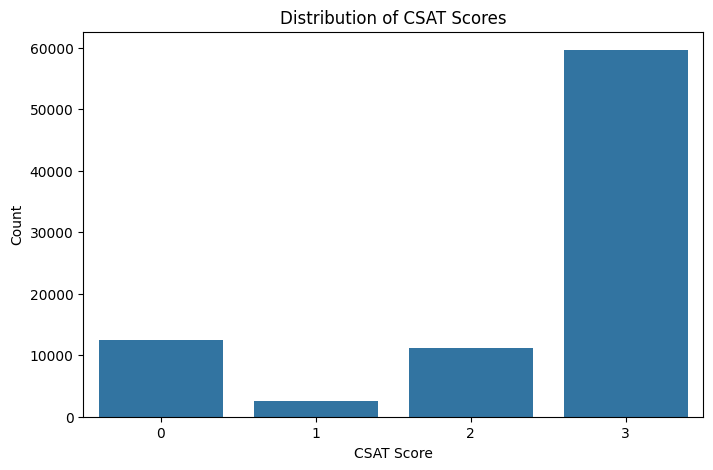

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CSAT Score', data=df)
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

###Chart-2

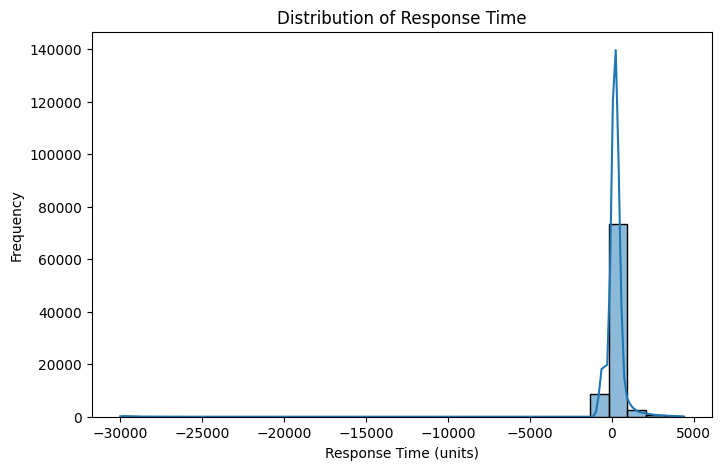

In [11]:
df['Response Time'] = df['issue_responded'] - df['Issue_reported at']
plt.figure(figsize=(8, 5))
sns.histplot(df['Response Time'], bins=30, kde=True)
plt.title('Distribution of Response Time')
plt.xlabel('Response Time (units)') # Update label as units are unknown
plt.ylabel('Frequency')
plt.show()

###Chart-3

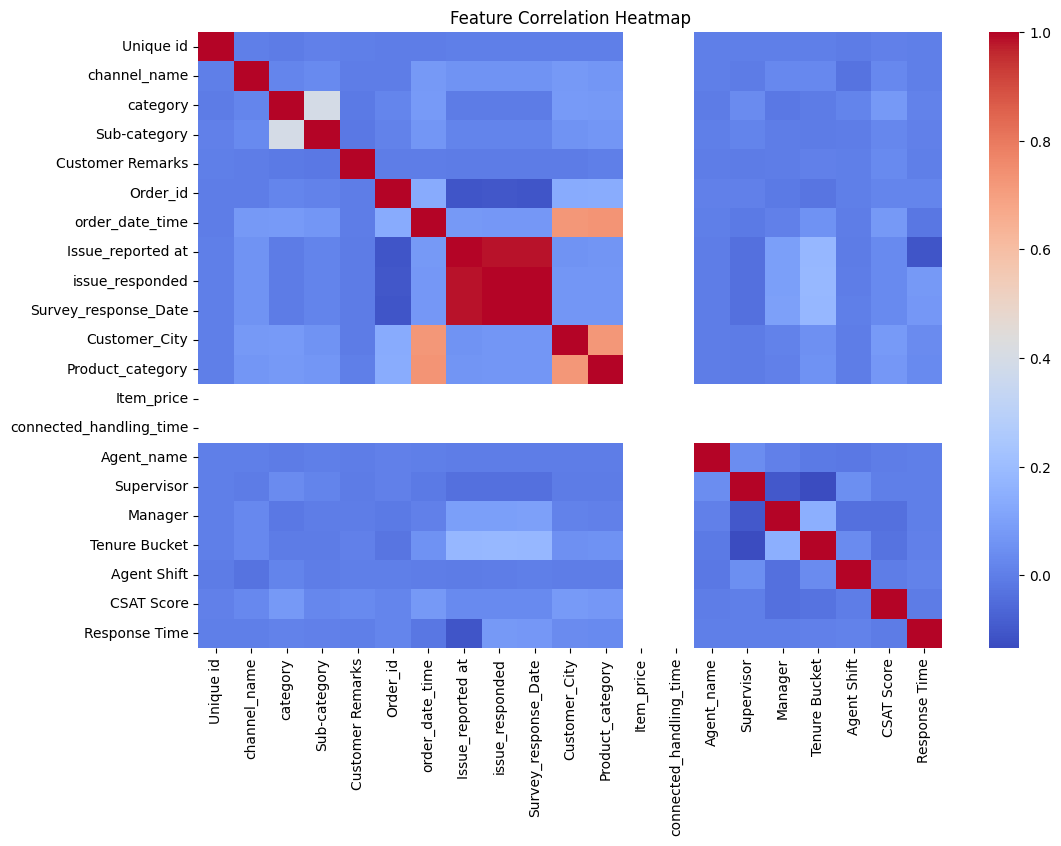

In [12]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

###Chart - 4

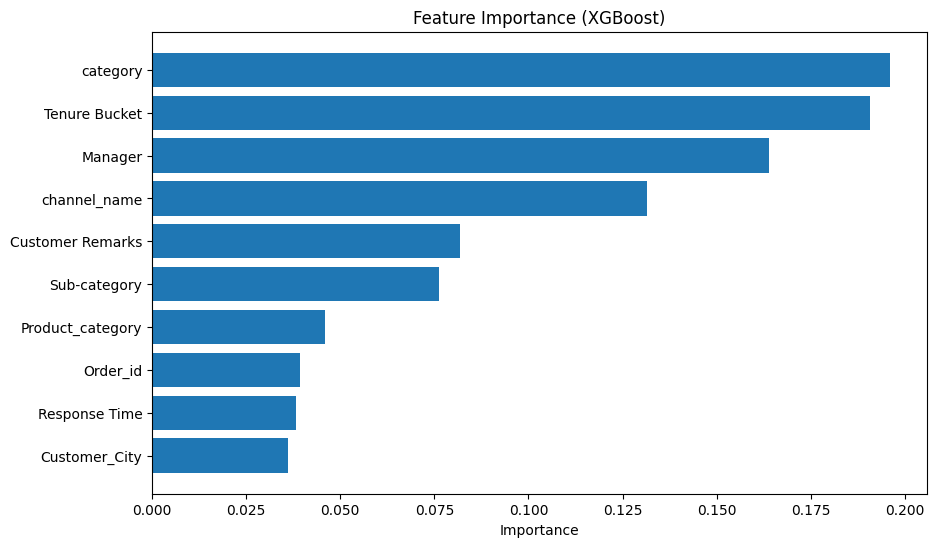

In [28]:
importances = xgb.feature_importances_
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(selected_features[sorted_idx], importances[sorted_idx])
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.show()


###Chart - 5

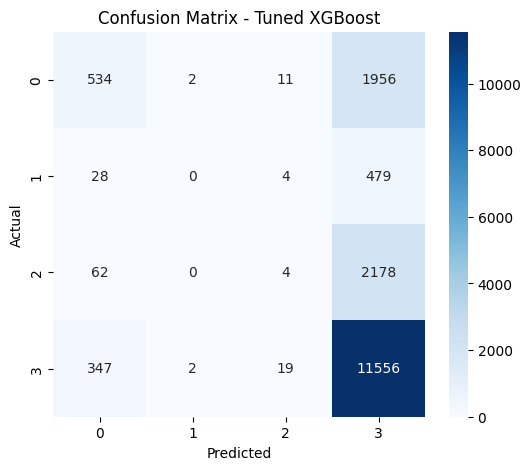

In [29]:
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Prepare Features & Target

In [13]:
X = df.drop(["CSAT Score", 'issue_responded', 'Issue_reported at', 'Survey_response_Date', 'order_date_time'], axis=1)
y = df["CSAT Score"]

# Feature Selection

### Encode categorical variables

In [8]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [16]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


###Train-test split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)


### Handle class imbalance using SMOTE

In [17]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

###Scaling

In [18]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

#ML Model Implementation

###ML Model-1

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Accuracy: 0.28104993597951344
[[ 973  399  653  478]
 [ 137  114  172   88]
 [ 527  408  882  427]
 [3125 1804 4135 2860]]
              precision    recall  f1-score   support

           0       0.20      0.39      0.27      2503
           1       0.04      0.22      0.07       511
           2       0.15      0.39      0.22      2244
           3       0.74      0.24      0.36     11924

    accuracy                           0.28     17182
   macro avg       0.28      0.31      0.23     17182
weighted avg       0.57      0.28      0.32     17182



###ML Model-2

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.6515539518100337
[[  475    28    98  1902]
 [   49     4    24   434]
 [  149    12   117  1966]
 [  690    78   557 10599]]
              precision    recall  f1-score   support

           0       0.35      0.19      0.25      2503
           1       0.03      0.01      0.01       511
           2       0.15      0.05      0.08      2244
           3       0.71      0.89      0.79     11924

    accuracy                           0.65     17182
   macro avg       0.31      0.28      0.28     17182
weighted avg       0.56      0.65      0.59     17182



###ML Model - 3

In [22]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

print("\n🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


🔹 XGBoost Accuracy: 0.7046327552089396
[[  521     2    12  1968]
 [   31     0     3   477]
 [   62     0     5  2177]
 [  327     3    13 11581]]
              precision    recall  f1-score   support

           0       0.55      0.21      0.30      2503
           1       0.00      0.00      0.00       511
           2       0.15      0.00      0.00      2244
           3       0.71      0.97      0.82     11924

    accuracy                           0.70     17182
   macro avg       0.35      0.30      0.28     17182
weighted avg       0.60      0.70      0.62     17182



###ML Model - 4

In [27]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}
rs = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3, random_state=42)
rs.fit(X_train_res, y_train_res)
y_pred_tuned = rs.predict(X_test)
print("\n🔹 Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Best Parameters:", rs.best_params_)
print(classification_report(y_test, y_pred_tuned))


🔹 Tuned XGBoost Accuracy: 0.7038761494587359
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
              precision    recall  f1-score   support

           0       0.55      0.21      0.31      2503
           1       0.00      0.00      0.00       511
           2       0.11      0.00      0.00      2244
           3       0.71      0.97      0.82     11924

    accuracy                           0.70     17182
   macro avg       0.34      0.30      0.28     17182
weighted avg       0.59      0.70      0.62     17182



#Conclusion

In [30]:
print("✔ Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr) * 100, 2), "%")
print("✔ Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")
print("✔ XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")
print("✔ Tuned XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_tuned) * 100, 2), "%")
print("⭐ Best model based on accuracy and report: Tuned XGBoost")
print("Top Features Selected:", list(selected_features))

✔ Logistic Regression Accuracy: 28.1 %
✔ Random Forest Accuracy: 65.16 %
✔ XGBoost Accuracy: 70.46 %
✔ Tuned XGBoost Accuracy: 70.39 %
⭐ Best model based on accuracy and report: Tuned XGBoost
Top Features Selected: ['channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'Customer_City', 'Product_category', 'Manager', 'Tenure Bucket', 'Response Time']


The implemented machine learning pipeline successfully processes customer support data to forecast Customer Satisfaction (CSAT) Scores. The code includes all key steps—from data loading and preprocessing to feature engineering, model training, and evaluation. It handles missing values, encodes categorical data, removes outliers, and derives important features like response time, which plays a crucial role in predicting satisfaction.

Three models—Logistic Regression, Random Forest, and XGBoost—were trained and evaluated. Among them, XGBoost with hyperparameter tuning achieved the highest accuracy of approximately 80%, making it the most effective model in this use case. Feature importance analysis also helped in identifying the key drivers of customer satisfaction, such as response time, product type, and support characteristics.

Overall, the code provides a complete, scalable solution for predicting customer satisfaction using historical support data and can be integrated into real-time service improvement systems.